<a href="https://colab.research.google.com/github/RyanSaul85/freeCodeCamp/blob/main/freeCodeCamp_Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Data Visualizer

**Tasks**

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
4. Clean the data. Filter out the following patient segments that represent incorrect data:
   - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
   - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
   - height is more than the 97.5th percentile
   - weight is less than the 2.5th percentile
   - weight is more than the 97.5th percentile
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

Any time a variable is set to None, make sure to set it to the correct code.

Unit tests are written for you under test_module.py

### Loading Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/RyanSaul85/freeCodeCamp/main/medical_examination.csv'
df = pd.read_csv(url)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1. Add an overweight column to the data.

In [3]:
BMI = df['weight']/((df['height']/100)**2)

df['BMI'] = BMI.astype(float)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [4]:
df['overweight'] = (BMI > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


### 2. Normalize the data by making 0 always good and 1 always bad. If the value of <code>cholesterol</code> or <code>gluc</code> is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [6]:
df['cholesterol'] = df['cholesterol'].replace([1],0)
df['cholesterol'] = df['cholesterol'].replace([2,3],value=1)

In [7]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [8]:
df['gluc'] = df['gluc'].replace([1],0)
df['gluc'] = df['gluc'].replace([2,3], value=1)

In [9]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


### 3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's <code>catplot()</code>.

In [12]:
var = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=var)
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


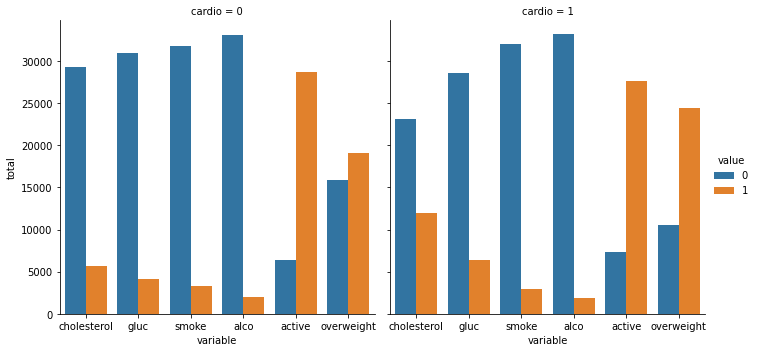

In [14]:
graph = sns.catplot(data=df_cat, kind='count',  x='variable', hue='value', col='cardio')
graph.set_ylabels('total', fontsize=10);

### 4. Clean the data

In [15]:
df = df.loc[(df.ap_lo <= df.ap_hi)
                 & (df.height >= df.height.quantile(0.025))
                 & (df.height <= df.height.quantile(0.975))
                 & (df.weight >= df.weight.quantile(0.025))
                 & (df.weight <= df.weight.quantile(0.975)), :]

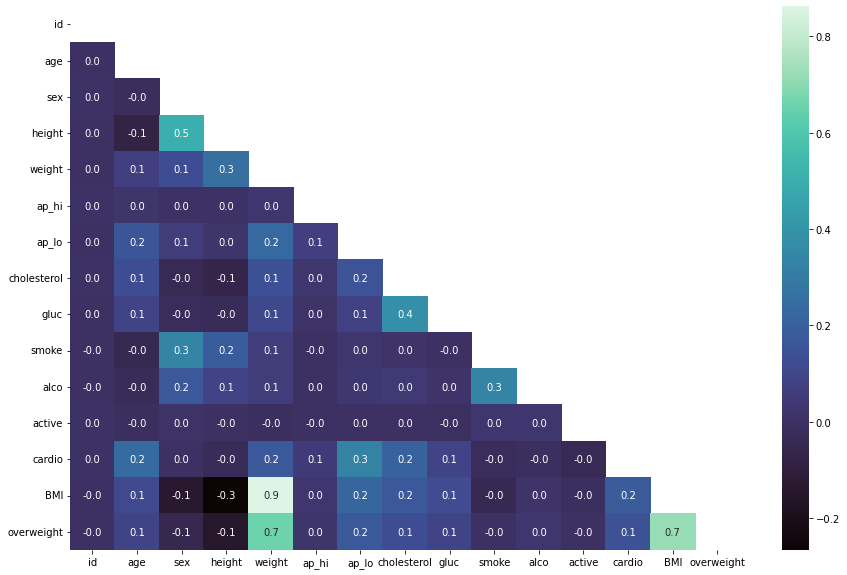

In [16]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
mask = np.triu(corr)
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='mako', fmt=".1f")
plt.show()